## KNN

Now that you're familiar with `sklearn`, you're ready to do a KNN regression.  

Sklearn's regressor is called `sklearn.neighbors.KNeighborsRegressor`. Its main parameter is the `number of nearest neighbors`. There are other parameters such as the distance metric (default for 2 order is the Euclidean distance). For a list of all the parameters see the [Sklearn kNN Regressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

In [20]:
#import pandas and numpy
import pandas as pd
import numpy as np

Let's start by first getting our dataset.

Our goal is to predict **mileage per gallon** of a car, given a bunch of other factors.

You've already seen this dataset! It was part of your HW2!

In [21]:
url = 'https://drive.google.com/uc?id=1eJR43LOmkbtKercI2iJHl_eJaZo2VfpY'
dfcars = pd.read_csv(url)
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [22]:
dfcars.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

Now that we know what our data looks like, we split into train and test

In [23]:
#train test split
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [24]:
print(traindf.head())
print(traindf.shape)
print(testdf.head())
print(testdf.shape)

                 name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
25          Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
12         Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
0           Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
4   Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
16  Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   

    gear  carb  
25     4     1  
12     3     3  
0      4     4  
4      3     2  
16     3     4  
(25, 12)
                   name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
8              Merc 230  22.8    4  140.8 

We're trying to predict mpg, and we don't really need name to predict

So, let's make our Y = mpg, and X = all other columns except mpg and name

In [25]:
y_train = np.array(traindf.mpg)
y_train.shape

(25,)

In [26]:
X_train = np.array(traindf.drop(['mpg','name'], axis=1))
X_train.shape

(25, 10)

Let's make a simple KNN!

In [27]:
# Import the library
from sklearn.neighbors import KNeighborsRegressor

In [28]:
# Set number of neighbors
k = 5
knnreg = KNeighborsRegressor(n_neighbors=k)

In [29]:
# Fit the regressor - make sure your numpy arrays are the right shape
knnreg.fit(X_train, y_train)

# Evaluate the outcome on the train set using R^2
r2_train = knnreg.score(X_train, y_train)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')

kNN model with 5 neighbors gives R^2 on the train set: 0.81415


Well, that was on our training set.
We don't know how well it generalizes until we do it on our testing set

In [30]:
#do the same for y_test and x_test
y_test = np.array(testdf.mpg)
X_test = np.array(testdf.drop(['mpg','name'], axis=1))

In [31]:
knnreg.predict(X_test)

# Evaluate the outcome on the test set using R^2
r2_test= knnreg.score(X_test, y_test)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_test:.5}')

kNN model with 5 neighbors gives R^2 on the train set: 0.77488


That was a pretty quick way to do it, but how do we know 5 is the best value of k? 

To test this out - we have to experiment with a bunch of different values and find out what the best value is

Text(0, 0.5, '$R^{2}$')

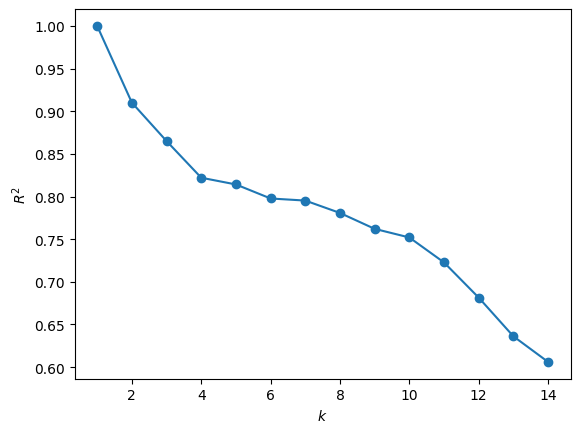

In [32]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(X_train, y_train) 
    
    # Calculate R^2 score
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)

# Plot
import matplotlib.pyplot as plt
plt.plot(ks, scores_train,'o-')
plt.xlabel(r'$k$')
plt.ylabel(r'$R^{2}$')

Huh that's weird. Why do you think the training set has a perfect R^2 score with a k value of 1?

Also, it turns out 5 is definitely not the best value for our training set. Instead, it seems like 2 works much better.

Let's make sure 2 does well on our testing set too

Text(0, 0.5, '$R^{2}$')

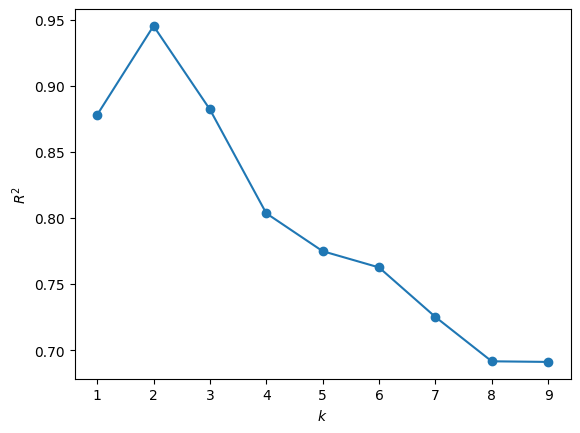

In [33]:
ks = range(1, 10) # Grid of k's
scores_test = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_test = knnreg.score(X_test, y_test) # Calculate R^2 score
    scores_test.append(score_test)

# Plot
plt.plot(ks, scores_test,'o-')
plt.xlabel(r'$k$')
plt.ylabel(r'$R^{2}$')

In [34]:
knnreg = KNeighborsRegressor(n_neighbors=2) # Create KNN model
knnreg.fit(X_train, y_train) # Fit the model to training data
r2_test = knnreg.score(X_test, y_test)
print(f'kNN model with 2 neighbors gives R^2 on the test set: {r2_test:.5}')

kNN model with 2 neighbors gives R^2 on the test set: 0.94517


Looks like 2 is the best value! So the final model we build will probably have a k value of 2.

Disclaimer:  <br>
This is a TINY dataset, so this model would probably not generalize well to any actual prediction you need to do.  <br>
k=2 is rare, and it might be because of how small our dataset is. <br>
In a real world case, your k will usually be bigger (but not too big)

## SVM

SVM can be used for both classification and regression. Let's start off with a regression model on the thing we just solved with KNN using SVR, or Support Vector Regression

In [36]:
from sklearn import svm
clf = svm.SVR(kernel='linear')    # In homework, SVC for classification; now, SVR for regression
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [37]:
y_pred

array([19.17864632, 10.15816705, 15.07846834, 26.77321215, 23.3523077 ,
       19.8458688 , 11.38011547])

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)


MSE:  8.971973118821143
RMSE:  2.9953252108612753
R2:  0.7756113745152479


Let's try the same thing, but with a polynomial kernel

In [39]:
from sklearn import svm
clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)


MSE:  19.803214114905796
RMSE:  4.450080236906499
R2:  0.504722546916434


Looks like the linear kernel works better!

[This](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/) tutorial explains how SVR works pretty well!

## Worksheet

In your worksheet today, you'll use KNN and SVM as classifiers for classification instead of regression, which is a more common usecase